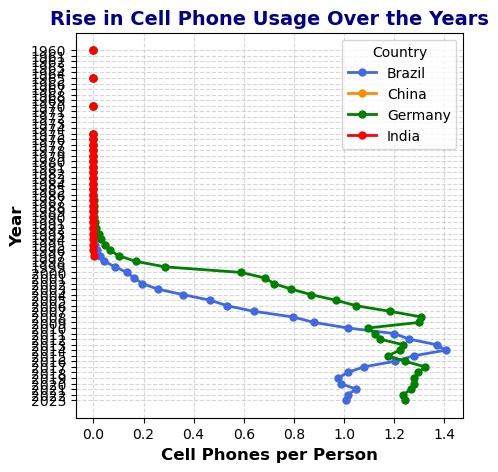

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_pop = pd.read_csv("pop.csv")
df_cell_phones = pd.read_csv("cell_phones_total.csv")
def convert_to_numeric(value):
    if isinstance(value, str):
        multiplier = 1e6 if "M" in value else 1e3 if "k" in value else 1
        value = value.replace("M", "").replace("k", "")
        try:
            return float(value) * multiplier
        except ValueError:
            return np.nan  # Handle non-convertible values
    return pd.to_numeric(value, errors="coerce")
years_overlap = [str(year) for year in range(1960, 2024)]
df_pop[years_overlap] = df_pop[years_overlap].map(lambda x: convert_to_numeric(x))
df_cell_phones[years_overlap] = df_cell_phones[years_overlap].map(lambda x: convert_to_numeric(x))
df_merged = pd.merge(df_pop[['country'] + years_overlap], df_cell_phones, on="country", suffixes=("_pop", "_phones"))
for year in years_overlap:
    df_merged[year + "_per_person"] = df_merged[year + "_phones"] / df_merged[year + "_pop"]
selected_countries = ["United States", "India", "China", "Germany", "Brazil"]
df_plot = df_merged[df_merged["country"].isin(selected_countries)]
plt.figure(figsize=(5, 5))  
colors = ["royalblue", "darkorange", "green", "red", "purple"]
for (index, row), color in zip(df_plot.iterrows(), colors):
    plt.plot(row[[year + "_per_person" for year in years_overlap]], years_overlap, 
             marker="o", linestyle="-", linewidth=2, markersize=5, 
             label=row["country"], color=color)
plt.ylabel("Year", fontsize=12, fontweight="bold")  # Year on Y-axis
plt.xlabel("Cell Phones per Person", fontsize=12, fontweight="bold")
plt.title("Rise in Cell Phone Usage Over the Years", fontsize=14, fontweight="bold", color="darkblue")
plt.gca().invert_yaxis()
plt.legend(title="Country", loc="upper right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()